NameError: name 'array' is not defined

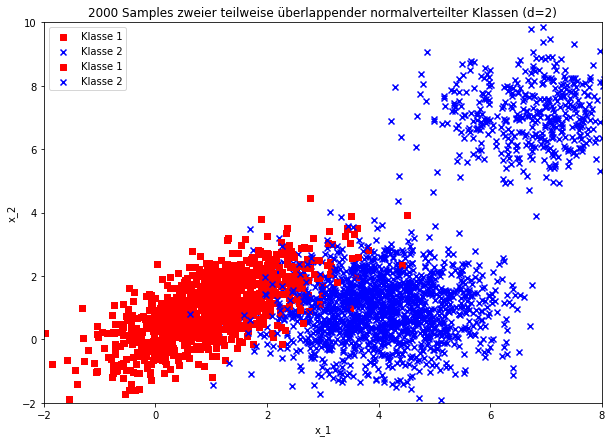

In [6]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

#Datenerzeugung

#Erzeugen Sie jeweils 1000 samples zweier (c=2) teilweise überlappender normalverteilter Klassen für d=2 und visualisieren Sie diese
# helper functions

def plot_2d(*rvs, xlim=[-2,8], ylim=[-2,6]):
    fig = plt.figure(1, figsize=(10,7))
    # Markierungen und Farben einstellen
    markers = ('s', 'x', 'o', 'ˆ', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap( colors[:len(rvs)])   
    i = 0
    for rv in rvs:
        plt.scatter(rv[:, 0], rv[:, 1], label="Klasse {}".format(i+1), marker=markers[i], c= cmap(i))
        i += 1
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.title("2000 Samples zweier teilweise überlappender normalverteilter Klassen (d=2)")
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.legend(loc="upper left")
    fig.show()
    
    

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    fig = plt.figure(1, figsize=(10,7))
    # Markierungen und Farben einstellen
    markers = ('s', 'x', 'o', 'ˆ', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap( colors[: len(np.unique( y))])
    # Plotten der Entscheidungsgrenze
    x1_min, x1_max = X[:, 0]. min() - 1, X[:, 0]. max() + 1
    x2_min, x2_max = X[:, 1]. min() - 1, X[:, 1]. max() + 1
    xx1, xx2 = np.meshgrid(np.arange( x1_min, x1_max, resolution), np.arange( x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([ xx1. ravel(), xx2. ravel()]). T)
    print(Z)
    Z = Z.reshape( xx1. shape)
    plt.contourf( xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim( xx1. min(), xx1. max())
    plt.ylim( xx2. min(), xx2. max())
    # Plotten aller Objekte
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(np.extract(y==cl, X[:, 0]), np.extract(y==cl, X[:, 1]), alpha = 0.8, c = cmap(idx),
                    marker = markers[idx], label = "Klasse {}".format(cl))
    plt.title("Trennfunktion eines Logistic-Regression-Klassifikator")
    plt.legend(loc="upper left")
    fig.show()
# unimodal verteilte Klassen c_1 und c_2
cov_1 = [[1, 0.7], [0.7, 1]]
cov_2 = [[1, 0], [0, 1]]

c_1_uni = scipy.stats.multivariate_normal.rvs(mean=[1, 1], cov=cov_1, size=1000)
c_2_uni = scipy.stats.multivariate_normal.rvs(mean=[4, 1], cov=cov_2, size=1000)

# bimodal bivariate noraml dist
c_2_bi = scipy.stats.multivariate_normal.rvs(mean=[4, 1], cov=cov_2, size=500)
c_2_bi = np.concatenate((c_2_bi, scipy.stats.multivariate_normal.rvs(mean=[7, 7], cov=cov_2, size=500)))

# create class labels
y_1 = np.full(shape=[1000, 1], fill_value=1)
y_2 = np.full(shape=[1000, 1], fill_value=2)

# Complete dataset
X_uni = np.concatenate((c_1_uni, c_2_uni), axis=0)
X_bi = np.concatenate((c_1_uni, c_2_bi), axis=0)
y = np.concatenate((y_1, y_2), axis=0)
plot_2d(c_1_uni, c_2_uni)

plot_2d(c_1_uni, c_2_bi, ylim=[-2,10])

def get_transformation(x_c, y_c):

    # Calculate covariance matrix

    phi_1 = np.multiply(x_c, x_c)
    phi_2 = np.multiply(y_c, y_c)
    phi_3 = np.multiply(x_c, y_c)
    phi_4 = x_c
    phi_5 = y_c
    phi_6 = np.ones(len(y_c))
    return [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6]

# Get transformed covariancem matrix and mean values
y_mean_1 = np.mean(get_transformation(c_1_uni[:,0], c_1_uni[:,1]), 1)
y_mean_2 = np.mean(get_transformation(c_2_uni[:,0], c_2_uni[:,1]), 1)


#np.cov(get_transformation(X_uni[:,0], X_uni[:,1]))

phi_matrix = np.array(get_transformation(X_uni[:,0], X_uni[:,1]))
cov =1.0 / len(X_uni[:,0]) * np.matmul(phi_matrix, np.transpose(phi_matrix) )
k_yy_inv = np.linalg.pinv(cov)


# Calculate weigh factors
n1 = len(c_1_uni[:,0])
n2 = len(c_2_uni[:,0])
nm_nm = n1 * y_mean_1 - n2 * y_mean_2
w = 1.0 / (n1 + n2) * np.matmul(k_yy_inv,nm_nm)
w.T
array([ 0.03532026,  0.01488609, -0.07405748, -0.61276591,  0.36725932,
        1.00090441])
class poly():
    def __init__(self, w):
        self.w = w
    def predict(self, xx):
        x = xx[:,0]
        y = xx[:,1]
        d_x = np.dot(self.w, get_transformation(x, y))
        rv = []   
        for z in d_x:
            if z > 0:
                rv.append(1)
            else:
                rv.append(2)    
        return np.array(rv)
